In [99]:
import pandas as pd

need_filepath = 'https://media.githubusercontent.com/media/LondonEnergyMap/cleandata/master/need/need_ldn.csv'
dfneed = pd.read_csv(need_filepath)

dfneed.head()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,walls,cwi,cwi_year,loftins,loftins_year,boiler,boiler_year,gcons,year,econs
0,0,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005,12500.0
1,1,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,2007,12500.0
2,2,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,2008,11000.0
3,3,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,2009,9500.0
4,4,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,2010,10000.0


In [100]:
# select only year 2012 and drop colum
dfneed = dfneed[dfneed.year == 2012]
dfneed.drop(columns=['year'], inplace=True)

In [101]:
prop_map = {101: 'detached house', 
            102: 'semi-detached house',
            103: 'end-terrace house',
            104: 'mid-terrace house',
            105: 'default bungalow',
            106: 'default flat'}

temp = dfneed.proptype.map(prop_map)
new = temp.str.split(' ', n=1, expand=True)
dfneed['type'] = new[1]
dfneed['form'] = new[0]

# create nrooms as floorarea band
dfneed['nroom'] = dfneed.floorarea_band

In [102]:
# create exposed sides column

type_mapping = {'house': 0, 'flat': -2, 'bungalow': 0.5}
form_mapping = {'detached': 0, 'semi-detached': -1, 'end-terrace': -1, 'mid-terrace': -2, 'default': 0}

dfneed['propmap'] = dfneed.type.map(type_mapping)
dfneed['formmap'] = dfneed.form.map(form_mapping)
dfneed['exposedsides'] = 6 + dfneed.propmap + dfneed.formmap

dfneed.propmap.unique()

array([ 0. , -2. ,  0.5])

In [103]:
# convert age column to 1,2,3,4
dfneed['age'] = dfneed.age - 100

In [104]:
dfneed.head()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,...,boiler,boiler_year,gcons,econs,type,form,nroom,propmap,formmap,exposedsides
6,6,1,1.0,NaN,1,1,104,4,3,2,...,NaN,NaN,19500.0,6300.0,house,mid-terrace,4,0.0,-2,4.0
13,13,9,4.0,1.0,1,2,102,3,3,1,...,NaN,NaN,30000.0,4400.0,house,semi-detached,3,0.0,-1,5.0
23,23,11,2.0,NaN,1,1,103,2,3,1,...,NaN,NaN,17000.0,5150.0,house,end-terrace,2,0.0,-1,5.0
27,27,36,4.0,NaN,1,1,102,3,4,2,...,NaN,NaN,24500.0,7950.0,house,semi-detached,3,0.0,-1,5.0
35,35,47,1.0,NaN,1,6,106,2,2,99,...,NaN,NaN,8800.0,1550.0,flat,default,2,-2.0,0,4.0


In [105]:
import numpy as np

# randomly map floor area band as floor area
tfa_dict = {1: [30,50], 2: [51,100], 3: [101, 150], 4: [151, 200]}

def areamap(areaband):
    return np.random.randint(*tfa_dict[areaband])

dfneed['tfa'] = dfneed.floorarea_band.map(areamap)

In [106]:
dfneed.head()

,Unnamed: 0,hid,imd_eng,e7,mainheatfuel,age,proptype,floorarea_band,epc_band,loftdepth,...,boiler_year,gcons,econs,type,form,nroom,propmap,formmap,exposedsides,tfa
6,6,1,1.0,NaN,1,1,104,4,3,2,...,NaN,19500.0,6300.0,house,mid-terrace,4,0.0,-2,4.0,192
13,13,9,4.0,1.0,1,2,102,3,3,1,...,NaN,30000.0,4400.0,house,semi-detached,3,0.0,-1,5.0,116
23,23,11,2.0,NaN,1,1,103,2,3,1,...,NaN,17000.0,5150.0,house,end-terrace,2,0.0,-1,5.0,60
27,27,36,4.0,NaN,1,1,102,3,4,2,...,NaN,24500.0,7950.0,house,semi-detached,3,0.0,-1,5.0,121
35,35,47,1.0,NaN,1,6,106,2,2,99,...,NaN,8800.0,1550.0,flat,default,2,-2.0,0,4.0,99


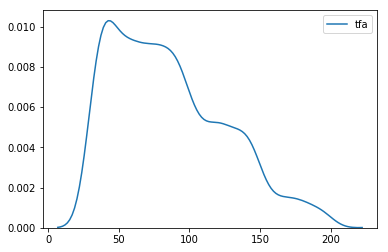

In [107]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.kdeplot(dfneed.tfa)

In [108]:
dfneed['gasmeters'] = 1
dfneed['elecmeters'] = 1

In [109]:
need_cols = ['hid', 
             'imd_eng', 
             'type', 
             'form', 
             'exposedsides', 
             'tfa', 
             'epc_band', 
             'age', 
             'nroom', 
             'mainheatfuel', 
             'gcons', 
             'econs',
             'gasmeters',
             'elecmeters']

dfneed = dfneed[need_cols]
dfneed.head()


,hid,imd_eng,type,form,exposedsides,tfa,epc_band,age,nroom,mainheatfuel,gcons,econs,gasmeters,elecmeters
6,1,1.0,house,mid-terrace,4.0,192,3,1,4,1,19500.0,6300.0,1,1
13,9,4.0,house,semi-detached,5.0,116,3,2,3,1,30000.0,4400.0,1,1
23,11,2.0,house,end-terrace,5.0,60,3,1,2,1,17000.0,5150.0,1,1
27,36,4.0,house,semi-detached,5.0,121,4,1,3,1,24500.0,7950.0,1,1
35,47,1.0,flat,default,4.0,99,2,6,2,1,8800.0,1550.0,1,1


In [110]:
dfneed.age.unique()

array([1, 2, 6, 3, 4, 5])

In [111]:
rename_cols = ['hid', 
             'imd', 
             'type', 
             'form', 
             'exposedsides', 
             'tfa', 
             'epc', 
             'age', 
             'nroom', 
             'maingas', 
             'gcons', 
             'econs',
             'gmeters',
             'emeters']
dfneed.columns = rename_cols

In [119]:
dfneed.econs.isnull().values.any()

False